<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS1erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PS 1**
1.  In few sentences explain why you use datasets you’re using: like a mini abstract with res q and hypotheses; extend and improve
as we go
over time the writeup must be longer and include at least: why these data, what’s the research questions, hypotheses and specific
variables you are interested in and why?; and as always– give exact url for data!
**Dataset Overview and Research Focus:**
For this analysis, I am examining data from 21 counties in New Jersey over the years 2020, 2021, and 2022 to explore the relationship between crime rates and police budget allocation.

**Research Question:**
How does the crime rate in counties across New Jersey influence the allocation of police budgets?

**Hypothesis:**
I hypothesize that counties with higher crime rates will allocate a greater proportion of their budget to police services. This is because counties with higher crime rates will need to direct more resources toward law enforcement to manage the increased demand for police intervention and services.

**Variables of Interest**:
1. **Crime Data:** The total number of crimes reported in each county per year. This variable serves as a proxy for the level of crime in the area and is expected to influence budget allocation for law enforcement.
2. **Police Budget:**  The total amount of money allocated to the police department in each county. This budget is critical for understanding how local governments prioritize law enforcement funding relative to other services.
3. **County:**The name of each county in New Jersey. This variable is important for comparing trends across different regions within the state.
4. **Year:** The year in which the data was collected (2020, 2021, 2022). Temporal trends will be considered, as changes over time may affect the budget allocation or crime rates due to policy changes, economic factors, or other influences.
**Data Sources:**
1.	**Crime Data:** The crime data will be obtained from the State of New Jersey Department of Law and Public Safety Office of Attorney General. This office provides crime statistics from municipalities and counties across the state as part of the Uniform Crime Reporting (UCR) program. The data will include reported crime numbers, categorized by crime type, and provide an insight into crime trends across New Jersey.

Source: State of New Jersey Department of Law and Public Safety Office of Attorney General.

URLs:
-	2020_Uniform_Crime_Report.xlsx
-	20241101_2021_Uniform_Crime_Report.xlsx
-	20241101_2022_Uniform_Crime_Report.xlsx

2.	**Police Budget Data:** The New Jersey Division of Local Government Services provides annual budget reports that detail county spending, including allocations for the police department. These reports are publicly available and provide valuable data on how counties allocate funds, including for law enforcement.
o	Source: State of New Jersey Department of Community Affairs, Division of Local Government Services
URL: https://www.nj.gov/dca/divisions/dlgs/resources/fiscal_rpts.shtml

3.	**Socioeconomic Data:** The New Jersey Department of Labor and Workforce Development provides population data, including county-level population estimates. This socioeconomic data will be useful for understanding the context in which crime and budget data are situated, as demographic factors can impact crime rates and budget allocations.

Source: New Jersey Department of Labor and Workforce Development

URL: https://www.nj.gov/labor/labormarketinformation/assetsPDFs/dmograh/est/copest23.htm

**Data Justification:**
The datasets selected are relevant because they directly address the research question of how crime rates correlate with police budget allocation. The crime data from the UCR database will provide a comprehensive view of crime in New Jersey’s counties, while the police budget data will allow us to analyze the financial resources allocated to law enforcement. Socioeconomic data, such as population size, will help contextualize the findings, as larger populations might inherently require more policing resources.
By using data from multiple years (2020, 2021, and 2022), this analysis can identify any trends or shifts in how counties respond to changes in crime rates over time and the effect of these changes on budget allocation.


2. Use at least 2 times each of the following in a way that makes sense and is useful:

• rename var

• replace vals

• drop or keep vars

• collabse data (groupby agg)


In [18]:
import pandas as pd #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))


Original Crime Data:
               County     2020     2021       2022
0    Total New Jersey  958,604  935,321  1,133,384
1     Atlantic County   46,551   42,324      1,245
2       Bergen County  193,882  208,751    294,129
3   Burlington County   44,940   48,929     52,173
4       Camden County  103,373  114,926    194,754
5     Cape May County   64,234   65,174     56,205
6   Cumberland County   17,378   14,656     17,993
7        Essex County   45,882   47,082     56,433
8   Gloucester County   38,332   35,690     40,038
9       Hudson County   32,374   29,689     38,604
10   Hunterdon County    8,036    7,447     10,467
11      Mercer County   21,976   21,813     26,797
12   Middlesex County   36,204   35,448     45,162
13    Monmouth County   85,417   70,450     76,941
14      Morris County   33,417   26,142     31,456
15       Ocean County   55,640   39,291     52,245
16     Passaic County   28,610   27,683     34,688
17       Salem County   19,312   15,548     14,772
18    Some

In [17]:
#original budget data uploaded
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20by%20county%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)
print("Original Budget Data:")
print(budget_data.head(30))

Original Budget Data:
               County                2020                2021                2022
0    Total New Jersey  $3,089,537,772.56   $3,362,824,807.29   $3,610,508,844.38 
1     Atlantic County    $119,262,425.86     $117,407,829.60     $123,993,860.75 
2       Bergen County    $427,518,344.81     $448,124,550.75     $471,782,982.68 
3   Burlington County    $122,407,763.95     $125,868,638.98     $128,190,733.44 
4       Camden County    $137,420,012.72     $135,626,159.37     $147,391,782.25 
5     Cape May County     $48,629,849.27      $52,207,062.40      $54,103,285.95 
6   Cumberland County     $35,045,613.87      $36,259,361.36      $37,329,195.20 
7        Essex County    $350,382,509.60     $464,878,127.99     $381,983,364.75 
8   Gloucester County     $67,519,873.43      $65,845,717.39      $79,816,171.41 
9       Hudson County    $290,272,331.25     $300,219,111.87     $377,519,753.78 
10   Hunterdon County     $28,100,764.97      $29,438,131.72      $31,540,75

In [16]:
#original population data uploaded
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data, header=1)
print("Original Population Data:")
print(population_data.head(30))

Original Population Data:
               County       2020       2021       2022
0    Total New Jersey  9,272,392  9,269,175  9,260,817
1     Atlantic County    274,190    274,956    275,382
2       Bergen County    953,690    955,383    953,540
3   Burlington County    461,682    464,479    466,101
4       Camden County    523,122    524,093    524,649
5     Cape May County     95,044     95,706     95,405
6   Cumberland County    153,719    152,083    151,347
7        Essex County    859,974    854,233    849,724
8   Gloucester County    302,563    304,592    306,767
9       Hudson County    721,879    703,448    702,381
10   Hunterdon County    128,786    129,671    129,805
11      Mercer County    386,466    382,172    380,779
12   Middlesex County    861,408    862,364    861,094
13    Monmouth County    642,836    646,517    644,228
14      Morris County    508,439    510,613    511,219
15       Ocean County    638,465    649,825    655,663
16     Passaic County    523,439    518

In [6]:
#rename crime
crime_data.rename(columns={
    'Unnamed: 1': 'county',
    '2020': 'crime_2020',
    '2021': 'crime_2021',
    '2022': 'crime_2022'
}, inplace=True)
crime_data = crime_data.dropna(subset=['county'])
crime_data['county'] = crime_data['county'].str.strip()
print("Renamed Crime Data:")
print(crime_data.head(30))




Renamed Crime Data:
               county crime_2020 crime_2021 crime_2022
0    Total New Jersey    958,604    935,321  1,133,384
1     Atlantic County     46,551     42,324      1,245
2       Bergen County    193,882    208,751    294,129
3   Burlington County     44,940     48,929     52,173
4       Camden County    103,373    114,926    194,754
5     Cape May County     64,234     65,174     56,205
6   Cumberland County     17,378     14,656     17,993
7        Essex County     45,882     47,082     56,433
8   Gloucester County     38,332     35,690     40,038
9       Hudson County     32,374     29,689     38,604
10   Hunterdon County      8,036      7,447     10,467
11      Mercer County     21,976     21,813     26,797
12   Middlesex County     36,204     35,448     45,162
13    Monmouth County     85,417     70,450     76,941
14      Morris County     33,417     26,142     31,456
15       Ocean County     55,640     39,291     52,245
16     Passaic County     28,610     27,683  

In [7]:
#rename budget
budget_data.rename(columns={
    'Unnamed: 1': 'county',
    '2020': 'police_budget_2020',
    '2021': 'police_budget_2021',
    '2022': 'police_budget_2022'
}, inplace=True)
budget_data = budget_data.dropna(subset=['county'])
budget_data['county'] = budget_data['county'].str.strip() #clean
print("Renamed Budget Data:")#see results
print(budget_data.head(30))

Renamed Budget Data:
               county  police_budget_2020  police_budget_2021  \
0    Total New Jersey  $3,089,537,772.56   $3,362,824,807.29    
1     Atlantic County    $119,262,425.86     $117,407,829.60    
2       Bergen County    $427,518,344.81     $448,124,550.75    
3   Burlington County    $122,407,763.95     $125,868,638.98    
4       Camden County    $137,420,012.72     $135,626,159.37    
5     Cape May County     $48,629,849.27      $52,207,062.40    
6   Cumberland County     $35,045,613.87      $36,259,361.36    
7        Essex County    $350,382,509.60     $464,878,127.99    
8   Gloucester County     $67,519,873.43      $65,845,717.39    
9       Hudson County    $290,272,331.25     $300,219,111.87    
10   Hunterdon County     $28,100,764.97      $29,438,131.72    
11      Mercer County     $93,981,950.66     $104,382,301.52    
12   Middlesex County    $253,427,739.92     $292,934,332.15    
13    Monmouth County    $261,784,930.78     $271,539,409.48    
14  

In [25]:
# raname population
url_population_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/population%20by%20county%20New%20Jersey.csv'
population_data = pd.read_csv(url_population_data, header=1)
population_data.rename(columns={
    'Unnamed: 1': 'County',  # Rename column'Unnamed: 1' to 'County'
    '2020': 'population_2020',
    '2021': 'population_2021',
    '2022': 'population_2022'
}, inplace=True)
population_data = population_data.dropna(subset=['County'])
population_data['County'] = population_data['County'].str.strip()
print("Renamed Population Data:")
print(population_data.head(30))

Renamed Population Data:
               County population_2020 population_2021 population_2022
0    Total New Jersey       9,272,392       9,269,175       9,260,817
1     Atlantic County         274,190         274,956         275,382
2       Bergen County         953,690         955,383         953,540
3   Burlington County         461,682         464,479         466,101
4       Camden County         523,122         524,093         524,649
5     Cape May County          95,044          95,706          95,405
6   Cumberland County         153,719         152,083         151,347
7        Essex County         859,974         854,233         849,724
8   Gloucester County         302,563         304,592         306,767
9       Hudson County         721,879         703,448         702,381
10   Hunterdon County         128,786         129,671         129,805
11      Mercer County         386,466         382,172         380,779
12   Middlesex County         861,408         862,364         861

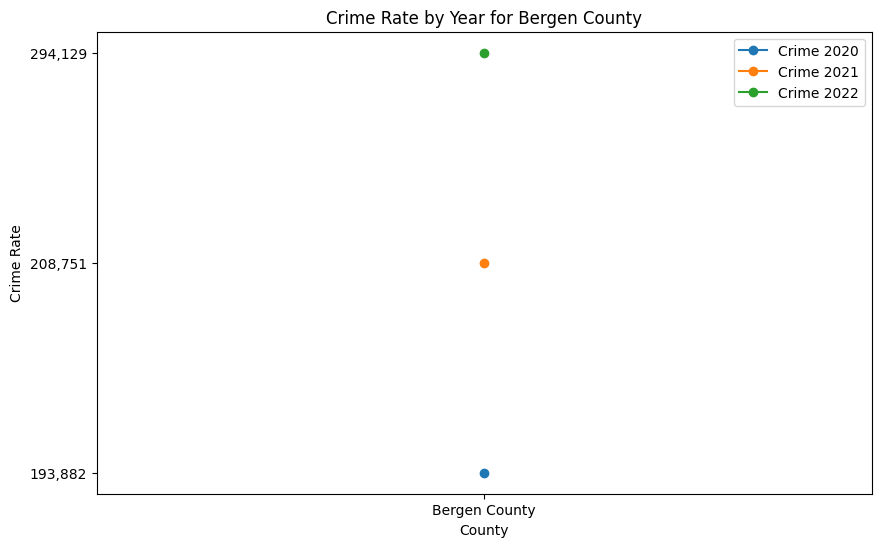

In [32]:
#replace crime
# Strip extra spaces from column names (if any)
crime_data.columns = crime_data.columns.str.strip()

# Now filter the data using the correct column name 'County'
county_data = crime_data[crime_data['County'] == 'Bergen County']

# Plotting Crime data for a specific county (e.g., Bergen County)
plt.figure(figsize=(10,6))
plt.plot(county_data['County'], county_data['2020'], label='Crime 2020', marker='o')
plt.plot(county_data['County'], county_data['2021'], label='Crime 2021', marker='o')
plt.plot(county_data['County'], county_data['2022'], label='Crime 2022', marker='o')

plt.title('Crime Rate by Year for Bergen County')
plt.xlabel('County')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()



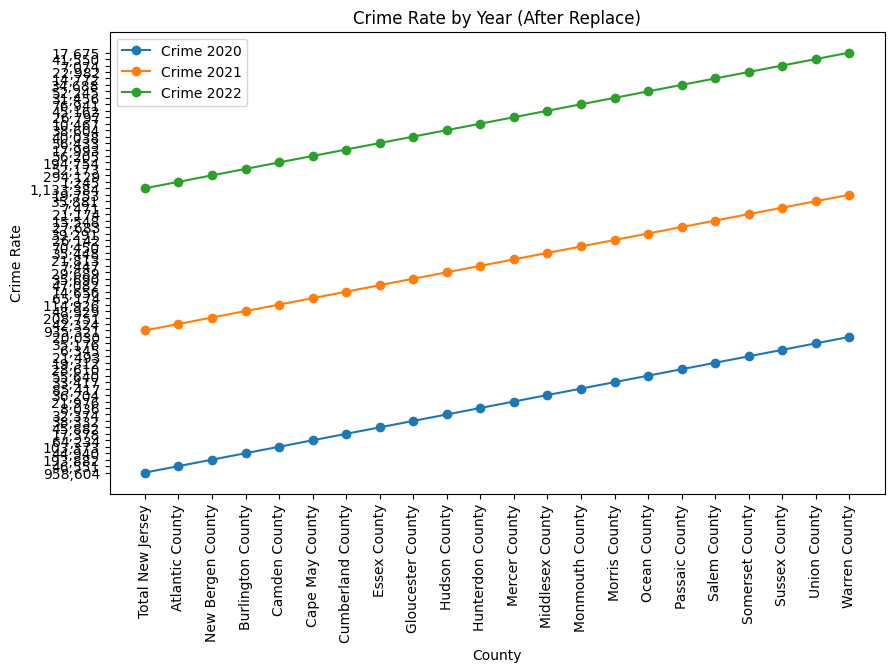

In [33]:
# Replace 'Bergen County' with a new value, e.g., 'New Bergen County'
crime_data['County'] = crime_data['County'].replace('Bergen County', 'New Bergen County')

# Plotting the crime data after replace
plt.figure(figsize=(10,6))
plt.plot(crime_data['County'], crime_data['2020'], label='Crime 2020', marker='o')
plt.plot(crime_data['County'], crime_data['2021'], label='Crime 2021', marker='o')
plt.plot(crime_data['County'], crime_data['2022'], label='Crime 2022', marker='o')

plt.title('Crime Rate by Year (After Replace)')
plt.xlabel('County')
plt.ylabel('Crime Rate')
plt.legend()
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

In [45]:

# budget data uploaded
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20by%20county%20New%20Jersey.csv'
budget_data = pd.read_csv(url_budget_data, header=1)

# Rename column
budget_data.rename(columns={
    'Unnamed: 1': 'County',
    '2020': 'budget_2020',
    '2021': 'budget_2021',
    '2022': 'budget_2022'
}, inplace=True)

# Replace from 'Bergen County' to 'New Bergen County'
budget_data['County'] = budget_data['County'].replace('Bergen County', 'New Bergen County')

# clean
budget_data['County'] = budget_data['County'].str.strip()

# show
print(budget_data.head(10))

              County         budget_2020         budget_2021         budget_2022
0   Total New Jersey  $3,089,537,772.56   $3,362,824,807.29   $3,610,508,844.38 
1    Atlantic County    $119,262,425.86     $117,407,829.60     $123,993,860.75 
2  New Bergen County    $427,518,344.81     $448,124,550.75     $471,782,982.68 
3  Burlington County    $122,407,763.95     $125,868,638.98     $128,190,733.44 
4      Camden County    $137,420,012.72     $135,626,159.37     $147,391,782.25 
5    Cape May County     $48,629,849.27      $52,207,062.40      $54,103,285.95 
6  Cumberland County     $35,045,613.87      $36,259,361.36      $37,329,195.20 
7       Essex County    $350,382,509.60     $464,878,127.99     $381,983,364.75 
8  Gloucester County     $67,519,873.43      $65,845,717.39      $79,816,171.41 
9      Hudson County    $290,272,331.25     $300,219,111.87     $377,519,753.78 
